In [ ]:
# !pip install pygambit

In [ ]:
import numpy as np
from itertools import permutations
from itertools import combinations
#import pygambit
#if use pygambit to check, the upper line should be de-annoted

In [ ]:
# the codes that reduce the number of permutations with constraints, restriction1 is corrolated to constraint1, restriction2,3 are correlated to constraint2
# restriction4,5 are correlated to constrainted 3
def verifyRestrictions(permutation):
    #
    restriction1 = permutation[0] > permutation[7] # a1 > a8
    restriction2 = permutation[0] > permutation[1] and permutation[0] > permutation[2] and permutation[0] > permutation[3]  # when player1 choose A, a1>a2 a1>a3  a1>a4
    restriction3 = permutation[4] > permutation[7] and permutation[5] > permutation[7] and permutation[6] > permutation[7]  # when player choose B, relationship among outcomes  a5>a8 a6>a8 a7>a8
    #if the negative effect is accumulated, eg ABB is worse than AAB
    restriction4 = permutation[2] > permutation[3] and permutation[1] > permutation[3]
    restriction5 = permutation[4] > permutation[5] and permutation[4] > permutation[6]
    if restriction1 and restriction2 and restriction3 and restriction4 and restriction5:
    # if restriction1 and restriction2 and restriction3 and restriction4:
            # and restriction2 and restriction3 and restriction4 and restriction5:
        return True
    return False

In [ ]:
#calculate all permuations
all_permutations = list(permutations(range(1, 9)))
PERM = list()
for per in all_permutations:
    if verifyRestrictions(per):
        PERM.append(per)

combinations_3 = list(combinations(PERM, 3))


In [ ]:
print("number of combinations:", len(combinations_3))
print("number of permutations:", len(PERM))

number of combinations: 3466100
number of permutations: 276


In [ ]:
#using gambit tools to generate a game with payoff matrixes
# def generateMatrix(combinations):
#     game = pygambit.Game.new_table([2, 2, 2])
#     strategyList = [game[0, 0, 0], game[0, 1, 0], game[0, 0, 1], game[0, 1, 1], game[1, 0, 0], game[1, 1, 0], game[1, 0, 1], game[1, 1, 1]]
#     perCount = 0
#     for strategy in strategyList:
#         for i in range(0,3):
#             strategy[i] = combinations[i][perCount]
#         # strategy[0] = combinations[0][perCount]
#         # strategy[1] = per2[perCount]
#         # strategy[2] = per3[perCount]
#         perCount += 1
#     return game

In [ ]:
# equ_result = {}
# count = 0
# for combination in combinations_3:
#     game = generateMatrix(combination)
#     count += 1
#     game.title = "game" + str(count)
#     equilibria = pygambit.nash.enumpure_solve(game)
#     equ_result[game.title] = equilibria
#     if count % 10000 == 0:
#       print(count,equilibria[0])

# # print("fianl resuilt", equ_result)

In [ ]:
# print(len(equ_result))

3466100


In [ ]:
# print(equ_result["game1000000"])

[[[Rational(0, 1), Rational(1, 1)], [Rational(1, 1), Rational(0, 1)], [Rational(1, 1), Rational(0, 1)]]]


In [ ]:
# print(combinations_3[999999])

((6, 3, 5, 1, 8, 7, 4, 2), (7, 5, 3, 2, 8, 6, 4, 1), (8, 5, 6, 4, 7, 2, 3, 1))


In [ ]:
# print(equ_result["game1000000"][0][0])
# print(equ_result["game1000000"][0][1])
# print(equ_result["game1000000"][0][2])

0
1
1


In [ ]:
# print(len(equ_result["game1000000"]))

1


In [ ]:
# reuslts = {"AAA":0, "ABA":0, "AAB":0, "ABB":0, "AAB":0, "BBA":0, "BAB":0, "BBB":0}
# for item in equ_result.values():
#   for equ in item:
#     if equ[0] == 0 and equ[1] == 0 and equ[2] == 0:
#       reuslts["AAA"] += 1
#     elif equ[0] == 0 and equ[1] == 1 and equ[2] == 0:
#       reuslts["ABA"] += 1
#     elif equ[0] == 0 and equ[1] == 0 and equ[2] == 1:
#       reuslts["AAB"] += 1
#     elif equ[0] == 0 and equ[1] == 1 and equ[2] == 1:
#       reuslts["ABB"] += 1
#     elif equ[0] == 1 and equ[1] == 0 and equ[2] == 0:
#       reuslts["BAA"] += 1
#     elif equ[0] == 1 and equ[1] == 1 and equ[2] == 0:
#       reuslts["BBA"] += 1
#     elif equ[0] == 1 and equ[1] == 0 and equ[2] == 1:
#       reuslts["BAB"] += 1
#     elif equ[0] == 1 and equ[1] == 1 and equ[2] == 1:
#       reuslts["BBB"] += 1


In [ ]:
# print(reuslts)

{'AAA': 0, 'ABA': 0, 'AAB': 0, 'ABB': 3018520, 'BBA': 0, 'BAB': 447580, 'BBB': 0}


In [ ]:
# the method that calculate the pure nash equilibria of a game by return the indexes of outcome
def isEquilbria(pmatrix):
    # result = {}
    # result = {"AAA": 0, "ABA": 0, "AAB": 0,"ABB": 0,"BAA": 0,"BBA": 0,"BAB": 0,"BBB": 0}
    # for the return of this function, it is a list of all indexes correlated to the outcome that is a PNE
    index_PNE = []
    for index, item in enumerate(pmatrix):
        if index == 0:
            # a1 > a4, c1 > c3, b1 > b2
            condition1 = item[0] > pmatrix[4][0]
            condition2 = item[1] > pmatrix[1][1]
            condition3 = item[2] > pmatrix[2][2]
            if condition1 and condition2 and condition3:
                # result["AAA"] = item
                # result["AAA"].append(item)
                index_PNE.append(index)
            else:
                continue
        elif index == 1:
            # a2 > a6, b2 > b1, b1 > b2
            condition1 = item[0] > pmatrix[5][0]
            condition2 = item[1] > pmatrix[0][1]
            condition3 = item[2] > pmatrix[3][2]
            if condition1 and condition2 and condition3:
                # result["ABA"] = item
                # result["ABA"].append(item)
                index_PNE.append(index)
            else:
                continue
        elif index == 2:
            # a3 > a7, b3 > b4, c3 > c1
            condition1 = item[0] > pmatrix[6][0]
            condition2 = item[1] > pmatrix[3][1]
            condition3 = item[2] > pmatrix[0][2]
            if condition1 and condition2 and condition3:
                # result["AAB"] = item
                # result["AAB"].append(item)
                index_PNE.append(index)
            else:
                continue
        elif index == 3:
            # a4 > a8, b4 > b3, c4 > c2
            condition1 = item[0] > pmatrix[7][0]
            condition2 = item[1] > pmatrix[2][1]
            condition3 = item[2] > pmatrix[1][2]
            if condition1 and condition2 and condition3:
                # result["ABB"] = item
                # result["ABB"].append(item)
                index_PNE.append(index)
            else:
                continue
        elif index == 4:
            # a5 > a1, b5 > b6, c5 > c7
            condition1 = item[0] > pmatrix[0][0]
            condition2 = item[1] > pmatrix[5][1]
            condition3 = item[2] > pmatrix[6][2]
            if condition1 and condition2 and condition3:
                # result["BAA"] = item
                # result["BAA"].append(item)
                index_PNE.append(index)
            else:
                continue
        elif index == 5:
            # a6 > a2, b6 > b5, c6 > c8
            condition1 = item[0] > pmatrix[1][0]
            condition2 = item[1] > pmatrix[4][1]
            condition3 = item[2] > pmatrix[7][2]
            if condition1 and condition2 and condition3:
                # result["BBA"] = item
                # result["BBA"].append(item)
                index_PNE.append(index)
            else:
                continue
        elif index == 6:
            # a7 > a3, b7 > b8, c7 > c5
            condition1 = item[0] > pmatrix[2][0]
            condition2 = item[1] > pmatrix[7][1]
            condition3 = item[2] > pmatrix[4][2]
            if condition1 and condition2 and condition3:
                # result["BAB"] = item
                # result["BAB"].append(item)
                index_PNE.append(index)
            else:
                continue
        elif index == 7:
            # a8 > a4, b8 > b7, c8 > c6
            condition1 = item[0] > pmatrix[3][0]
            condition2 = item[1] > pmatrix[6][1]
            condition3 = item[2] > pmatrix[5][2]
            if condition1 and condition2 and condition3:
                # result["BBB"] = item
                # result["BBB"].append(item)
                index_PNE.append(index)
            else:
                continue
        else:
            return False
    return index_PNE

In [ ]:
# is realted to the free_riderPD in the project
def isPrison(pmatrix):
  # pmatrix = [[AAA0],[ABA1],[AAB2],[ABB3],[BAA4],[BBA5],[BAB6],[BBB7]]
  con1 = pmatrix[4][0] > pmatrix[0][0]
  con2 = pmatrix[7][0] > pmatrix[3][0]
  con3 = pmatrix[6][0] > pmatrix[2][0]
  con4 = pmatrix[4][0] > pmatrix[6][0] and  pmatrix[6][0] > pmatrix[7][0]
  con5 = pmatrix[0][0] > pmatrix[2][0] and  pmatrix[2][0] > pmatrix[3][0]
  if con1 and con2 and con3 and con4 and con5:
    return True
  else:
    False

In [ ]:
prison_index = []
for index, comb in enumerate(combinations_3):
  pmatrix = np.array([[comb[j][i] for j in range(len(comb))] for i in range(len(comb[0]))])
  if isPrison(pmatrix):
    prison_index.append(index)
print(len(prison_index))

1485330


In [ ]:
count = 0
for i in prison_index:
  count += 1
  if count == 9:
    break
  print(i)

0
1
2
3
4
5
6
7


In [ ]:
print(combinations_3[7])

((5, 2, 3, 1, 8, 6, 7, 4), (5, 2, 3, 1, 8, 7, 6, 4), (5, 3, 4, 2, 8, 7, 6, 1))


In [ ]:
print(combinations_3[1485330-1])

((6, 5, 3, 1, 8, 4, 7, 2), (8, 4, 5, 1, 7, 6, 3, 2), (8, 5, 7, 4, 6, 3, 2, 1))


In [ ]:
# this is the most important block that calculate PNE of all permutation sets with the method defined above
my_test = []
acount = 0
total_result_count = 0 # to calculate how many PNEs are there for all games
PNE_each_outcome = {"AAA": 0, "ABA": 0, "AAB": 0,"ABB": 0,"BAA": 0,"BBA": 0,"BAB": 0,"BBB": 0}

for index, comb in enumerate(combinations_3):
  # each comb is a game actually

  # for testing, use only 2
  # acount += 1
  # if acount == 3:
  #   break

  # generate the game, or can be said as generate payoff matrix of a game
  # pmatrix = []
  # for i in range(len(comb[0])):
  #   row = []
  #   for j in range(len(comb)):
  #     row.append(comb[j][i])
  #     pmatrix.append(row)
  #   pmatrix = np.array(pmatrix)

  pmatrix = np.array([[comb[j][i] for j in range(len(comb))] for i in range(len(comb[0]))])

  PNE_result = isEquilbria(pmatrix)

  #we need to do statistic work

  # to count how many PNEs are distributed in 8 types of outcome
  if PNE_result:
    for outcome_index in PNE_result:
      if outcome_index == 0:
        PNE_each_outcome["AAA"] += 1
      elif outcome_index == 1:
        PNE_each_outcome["ABA"] += 1
      elif outcome_index == 2:
        PNE_each_outcome["AAB"] += 1
      elif outcome_index == 3:
        PNE_each_outcome["ABB"] += 1
      elif outcome_index == 4:
        PNE_each_outcome["BAA"] += 1
      elif outcome_index == 5:
        PNE_each_outcome["BBA"] += 1
      elif outcome_index == 6:
        PNE_each_outcome["BAB"] += 1
      elif outcome_index == 7:
        PNE_each_outcome["BBB"] += 1
    # print(PNE_result)
    # print(PNE_each_outcome)
    my_test.append({index:PNE_result})


In [ ]:
print(len(my_test))

3466100


In [ ]:
print(PNE_each_outcome)

{'AAA': 447580, 'ABA': 0, 'AAB': 0, 'ABB': 0, 'BAA': 3018520, 'BBA': 0, 'BAB': 0, 'BBB': 0}


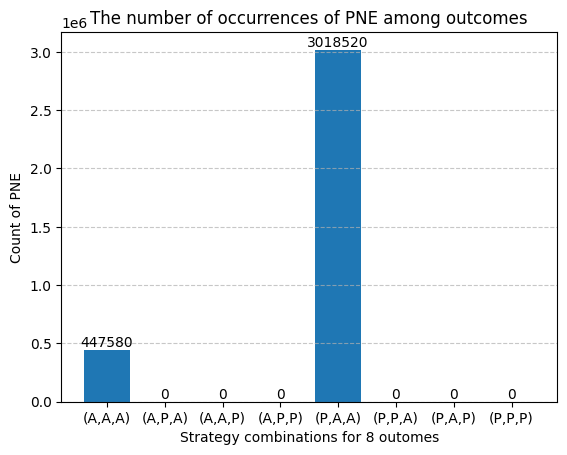

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt


categories = ['(A,A,A)', '(A,P,A)', '(A,A,P)', '(A,P,P)', '(P,A,A)','(P,P,A)', '(P,A,P)', '(P,P,P)']
values = [447580, 0, 0, 0, 3018520, 0, 0, 0]


plt.bar(categories, values)


plt.xlabel('Strategy combinations for 8 outomes')
plt.ylabel('Count of PNE')
plt.title('The number of occurrences of PNE among outcomes')

for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.show()
plt.savefig('overall_result.png')

In [ ]:
print(my_test[0])

{0: [4]}


In [ ]:
# game_AAA = []
# game_PAA = []
# my_test的结果是一个列表，列表中的每个元素是一个字典，字典的key是index，value是代表PNE在8个outcomes中的下标
game_AAA = [key for d in my_test for key, value in d.items() if value[0] == 0]
game_PAA = [key for d in my_test for key, value in d.items() if value[0] == 4]

In [ ]:
print(len(game_AAA), len(game_PAA))

447580 3018520


In [ ]:
outcomes_AAA = []
countAAA = 0
for index in game_AAA:
  # countAAA += 1
  # if countAAA == 5:
  #   break
  game = combinations_3[index]
  tup = (game[0][0], game[1][0], game[2][0])
  if tup == (8,8,8):
    continue
  else:
    outcomes_AAA.append((game[0][0], game[1][0], game[2][0]))
print(outcomes_AAA)

[]


In [ ]:
# count = 0
# for i in game_AAA:
#   count += 1
#   if count == 5:
#     break
#   print(i)

3018520
3018521
3018522
3018523


In [ ]:
print(combinations_3[3018520])

((8, 2, 3, 1, 7, 5, 6, 4), (8, 2, 3, 1, 7, 6, 5, 4), (8, 2, 4, 1, 7, 5, 6, 3))


In [ ]:
# print(combinations_3[0])

((5, 2, 3, 1, 8, 6, 7, 4), (5, 2, 3, 1, 8, 7, 6, 4), (5, 2, 4, 1, 8, 6, 7, 3))


In [ ]:
# a = [[combinations_3[0][j][i] for j in range(len(combinations_3[0]))] for i in range(len(combinations_3[0][0]))]